In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


**Telecomm Customer Churn analysis and Retention Modeling and Strategy**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [3]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here we can see that 'TotalCharges' is object type but ideally it should be float
So, we'll try to convert it to float type

In [7]:
df['TotalCharges'].isnull().sum()

0

In [8]:
## checking for all the rows having values other than 0-9
filter = df.TotalCharges.str.match('^[0-9]')
df[~filter]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df[~filter]['TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

As we can see only index numbers are being shown but no numeric valus is found, instead it just a single space character

In [10]:
df.iloc[488]['TotalCharges']

' '

Filling all the Space characters with Median

In [11]:
temp_df = df.drop(index=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754 ])

In [12]:
temp_df['TotalCharges'] = temp_df['TotalCharges'].astype('float64')

In [13]:
temp_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
temp_df['TotalCharges'].median()

1397.475

Replacing space character with median on the rows found above

In [15]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [16]:
df['TotalCharges'][ df['TotalCharges'] == ' ' ] = 1397.475

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df['TotalCharges'].iloc[488]

# As we can see the rows having space character are now filled with median

1397.475

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

TotalCharges have been converted to float type

In [19]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Warnings Suppression

In [20]:
import warnings
warnings.filterwarnings('ignore')

## Drop ID Feature from the dataset

In [21]:
df = df.drop(['customerID'], axis=1)

## Label the Churn feature to 1/0

In [22]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [23]:
df['target'] = np.where(df['Churn']=='Yes', 1, 0)

## Drop the Churn feature to retain only Target

In [24]:
df=df.drop(['Churn'],axis=1)

## Defining Target and Independent Features

In [25]:
Y = df[['target']]
X = df.drop(['target'], axis=1)

## Get the Churn Rate

In [26]:
Y.mean()

target    0.26537
dtype: float64

## Split features into Numerical and Categorical

In [27]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')

In [28]:
num.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60
7042,0,66,105.65,6844.50


In [29]:
num.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [30]:
#Check whether SeniorCitizen feature is an indicator

num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [31]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


## Dropping the indicator features from num to build a separate DF

In [32]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

## Outlier Analysis of Numerical Features

In [33]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.900000
5%,1.000000,19.650000,49.650000
10%,2.000000,20.050000,84.610000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000


## Capping and Flooring of outliers

We do capping just to make sure that standard deviation of the features and their variances does not change a whole lot, cause variance decides the predictive power of that feature 

In [34]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return x

In [35]:
num = num.apply(lambda x: outlier_cap(x))

In [36]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2279.361600
std,24.557454,30.062810,2258.540338
min,1.000000,19.200000,19.900000
1%,1.000000,19.200000,19.900000
5%,1.000000,19.650000,49.650000
10%,2.000000,20.050000,84.610000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000


## Missing Value Analysis

In [37]:
num.isnull().mean()

# Since the data does not contain any missing values Imputation Processes are not required

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

## Feature Selection - Numerical Features

## Part 1 : Remove Features with 0 Variance

In [38]:
from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)
#Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [39]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

## Part 2 - Bi Variate Analysis (Feature Discretization)

In [40]:
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index = num_1.index, columns=num_1.columns ).add_suffix('Rank')
num_binned.head()

,tenureRank,MonthlyChargesRank,TotalChargesRank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


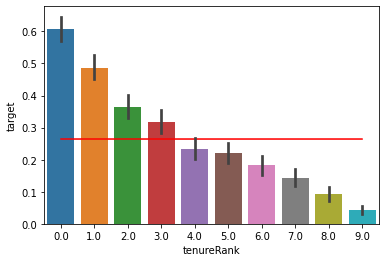

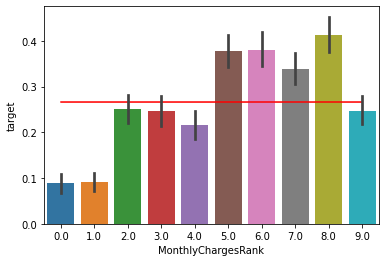

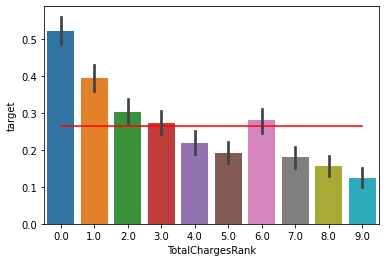

In [41]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['target'].mean(), data=X_bin_combined, color='red')
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [42]:
# All features from num_2 will get selected due to good discrimination
select_features_df_num=num_1

In [43]:
num_1.shape

(7043, 3)

## Feature Selection - Categorical Features

In [44]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

## Part 1 - Bi Variate Analysis

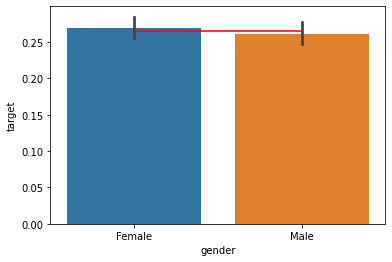

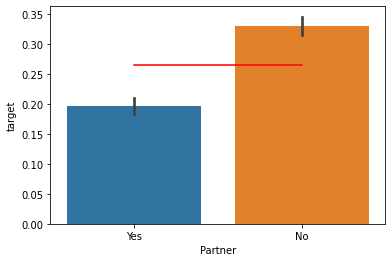

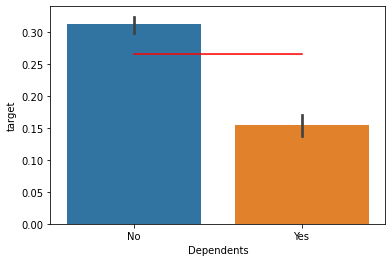

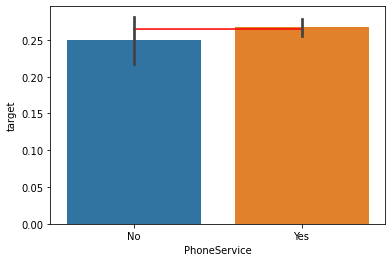

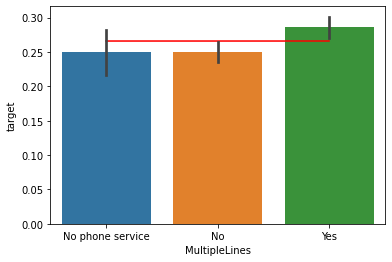

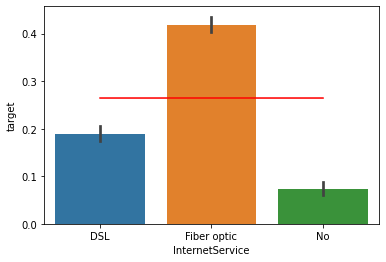

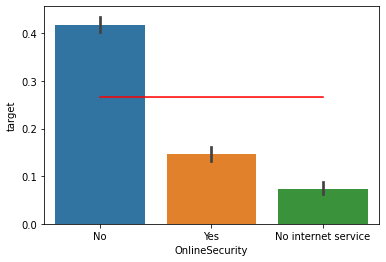

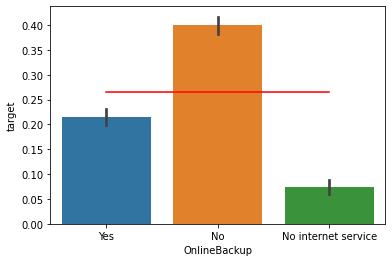

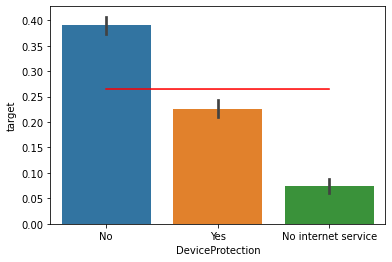

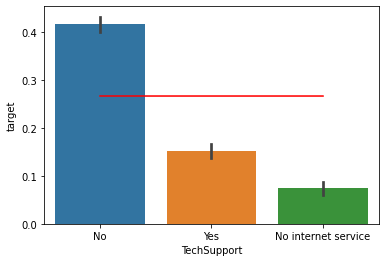

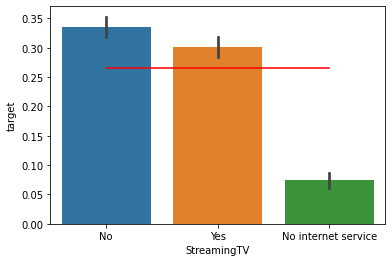

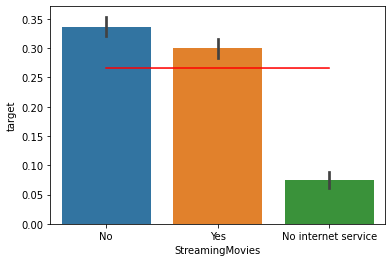

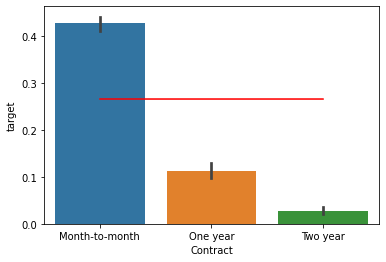

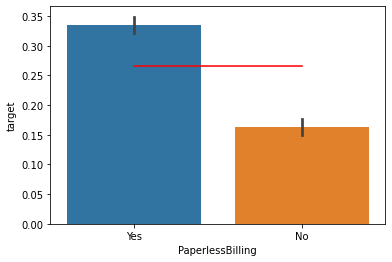

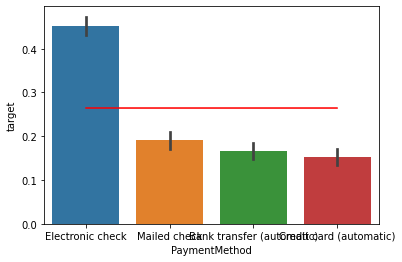

In [45]:
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['target'].mean(), data=X_char_merged, color='red')
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [46]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [47]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char,drop_first = True)
X_char_dum.shape

(7043, 22)

## Part 2 - Select K Best

In [48]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [49]:
select_features_df_char.shape

(7043, 20)

## Feature Selection - Numerical Indicator Features

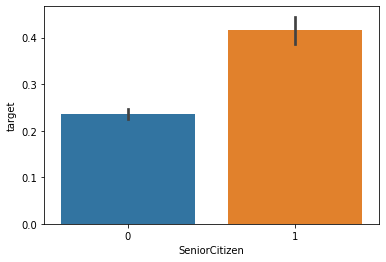

In [50]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [51]:
select_features_df_ind=ind

## Creating the Master Feature Set for Model Development

In [52]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [53]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

## Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=99)

In [55]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data target    0.265314
dtype: float64
Response Rate in Testing Data target    0.265499
dtype: float64


## Model Building

In [56]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)

In [57]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [58]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.050376
1,Dependents_Yes,-0.187757
2,InternetService_Fiber optic,0.554334
3,InternetService_No,-0.168163
4,OnlineSecurity_No internet service,-0.168163
5,OnlineSecurity_Yes,-0.537322
6,OnlineBackup_No internet service,-0.168163
7,OnlineBackup_Yes,-0.242833
8,DeviceProtection_No internet service,-0.168163
9,DeviceProtection_Yes,-0.021401


In [59]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=99)

In [60]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [61]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=99)

In [62]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 3.1 MB/s            
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=127f04dcbe75e9d544bccb9565456072dbf3186252ea154e6d1731e345c5efed
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


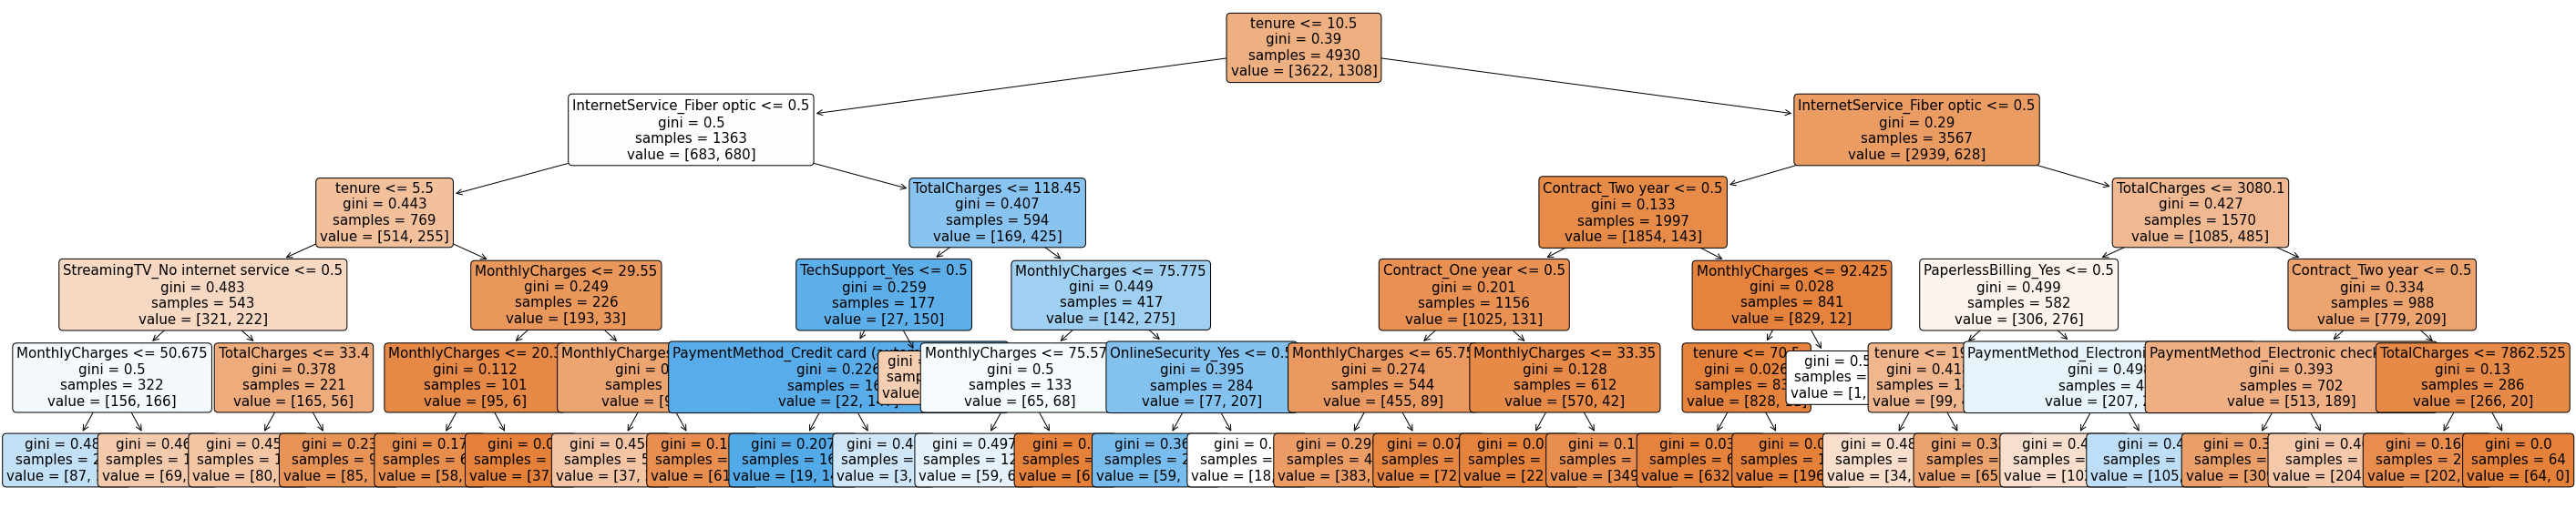

In [63]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [64]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=99)

In [65]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.210769
TotalCharges,0.137358
InternetService_Fiber optic,0.125506
PaymentMethod_Electronic check,0.097766
Contract_Two year,0.089422
MonthlyCharges,0.054412
Contract_One year,0.035487
OnlineSecurity_Yes,0.030397
PaperlessBilling_Yes,0.029803
TechSupport_Yes,0.025708


In [66]:
#stacking
base_learners = [      ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                       ('dtree', DecisionTreeClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50))
                       ] 

In [67]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [68]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('dtree',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_split=50,
                                                       random_state=99))],
                   final_estimator=LogisticRegression())

In [69]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [70]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [71]:
print('Logistic Regression')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Logistic Regression
Accuracy: 0.7993374349266446
Precision 0.6560364464692483
Recall 0.5133689839572193
f1_score 0.5760000000000001


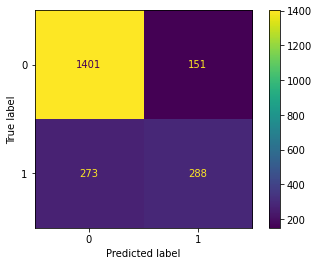

In [72]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [73]:
print('Decision Tree')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Decision Tree
Accuracy: 0.7889256980596309
Precision 0.631578947368421
Recall 0.4919786096256685
f1_score 0.5531062124248498


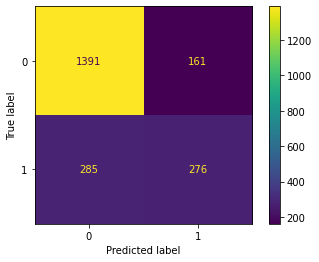

In [74]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [75]:
print('Random Forest')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Random Forest
Accuracy: 0.7927117841930904
Precision 0.6732394366197183
Recall 0.42602495543672014
f1_score 0.5218340611353712


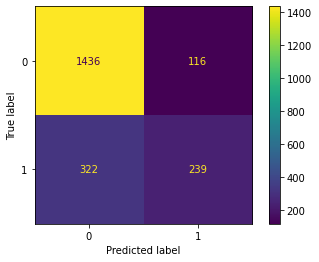

In [76]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [77]:
print('Stacking')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Stacking
Accuracy: 0.7974443918599148
Precision 0.6557377049180327
Recall 0.49910873440285203
f1_score 0.5668016194331983


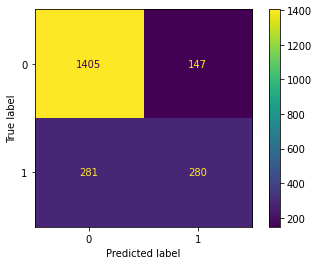

In [78]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

## Probability Decile Analysis

In [79]:
# Logistic Regression Lorenz Curve

y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed




,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.757447,0.717227,534.0,534.0,0.285714,0.285714,171.0,171.0,0.033050,0.033050,0.2527,0.100099,0.100099,1
1,9,704,0.586648,0.579826,413.0,947.0,0.220974,0.506688,291.0,462.0,0.056243,0.089293,0.4174,0.099957,0.200057,2
2,8,704,0.436080,0.452979,307.0,1254.0,0.164259,0.670947,397.0,859.0,0.076730,0.166022,0.5049,0.099957,0.300014,3
3,7,704,0.311080,0.327987,219.0,1473.0,0.117175,0.788122,485.0,1344.0,0.093738,0.259760,0.5284,0.099957,0.399972,4
4,6,704,0.234375,0.225060,165.0,1638.0,0.088283,0.876404,539.0,1883.0,0.104175,0.363935,0.5125,0.099957,0.499929,5
5,5,705,0.151773,0.157115,107.0,1745.0,0.057250,0.933654,598.0,2481.0,0.115578,0.479513,0.4541,0.100099,0.600028,6
6,4,704,0.071023,0.097532,50.0,1795.0,0.026752,0.960407,654.0,3135.0,0.126401,0.605914,0.3545,0.099957,0.699986,7
7,3,704,0.063920,0.054069,45.0,1840.0,0.024077,0.984484,659.0,3794.0,0.127368,0.733282,0.2512,0.099957,0.799943,8
8,2,704,0.026989,0.023722,19.0,1859.0,0.010166,0.994650,685.0,4479.0,0.132393,0.865675,0.1290,0.099957,0.899901,9
9,1,705,0.014184,0.006583,10.0,1869.0,0.005350,1.000000,695.0,5174.0,0.134325,1.000000,0.0000,0.100099,1.000000,10


* Gain Chart 
Gain at a given decile level is the ratio of cumulative number of targets (events) up to that decile to the total number of targets (events) in the entire data set
% of targets (events) covered at a given decile level. For example, 80% of targets covered in top 20% of data based on model. In the case of propensity to buy model, we can say we can identify and target 80% of customers who are likely to buy the product by just sending email to 20% of total customers.

* Lift Chart
It measures how much better one can expect to do with the predictive model comparing without a model. It is the ratio of gain % to the random expectation % at a given decile level. The random expectation at the xth decile is x%.

Ex: The Cum Lift of 4.03 for top two deciles, means that when selecting 20% of the records based on the model, one can expect 4.03 times the total number of targets (events) found by randomly selecting 20%-of-file without a model.

## Actual Vs. Predicted Event rate

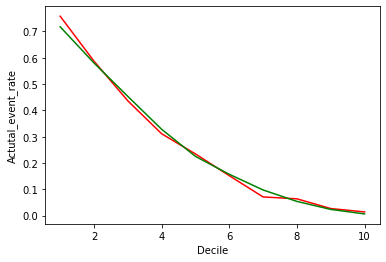

In [80]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='green')

## Gains Chart

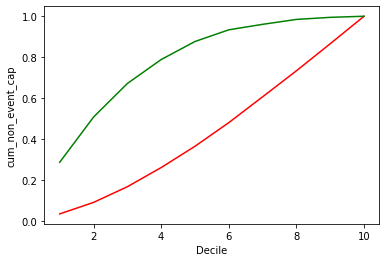

In [81]:
ax = sns.lineplot( x="Decile", y="cum_non_event_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='green')

#we can see maximum eevents are being captured by 4th decile
#so we can build a startegy till 4th decile for maximum returns